# TCS Internship

# 1. Imported necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

 LOADING THE DATASET INTO PYTHON ENVIRONMENT

In [2]:
data=pd.read_csv('salarydata.csv')

In [3]:
#IMPORT READ DATA
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#CHECK DATA INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
#DESCRIBE DATA
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#CHECK SHAPE OF DATA
data.shape

(32561, 14)

In [8]:
#CHECK DATA COLUMNS
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [9]:
#CHECK UNIQUE VALUES
data.nunique()

age                73
workclass           9
education          16
education-num      16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     42
salary              2
dtype: int64

# 2. Exploratory Data Analysis (EDA)


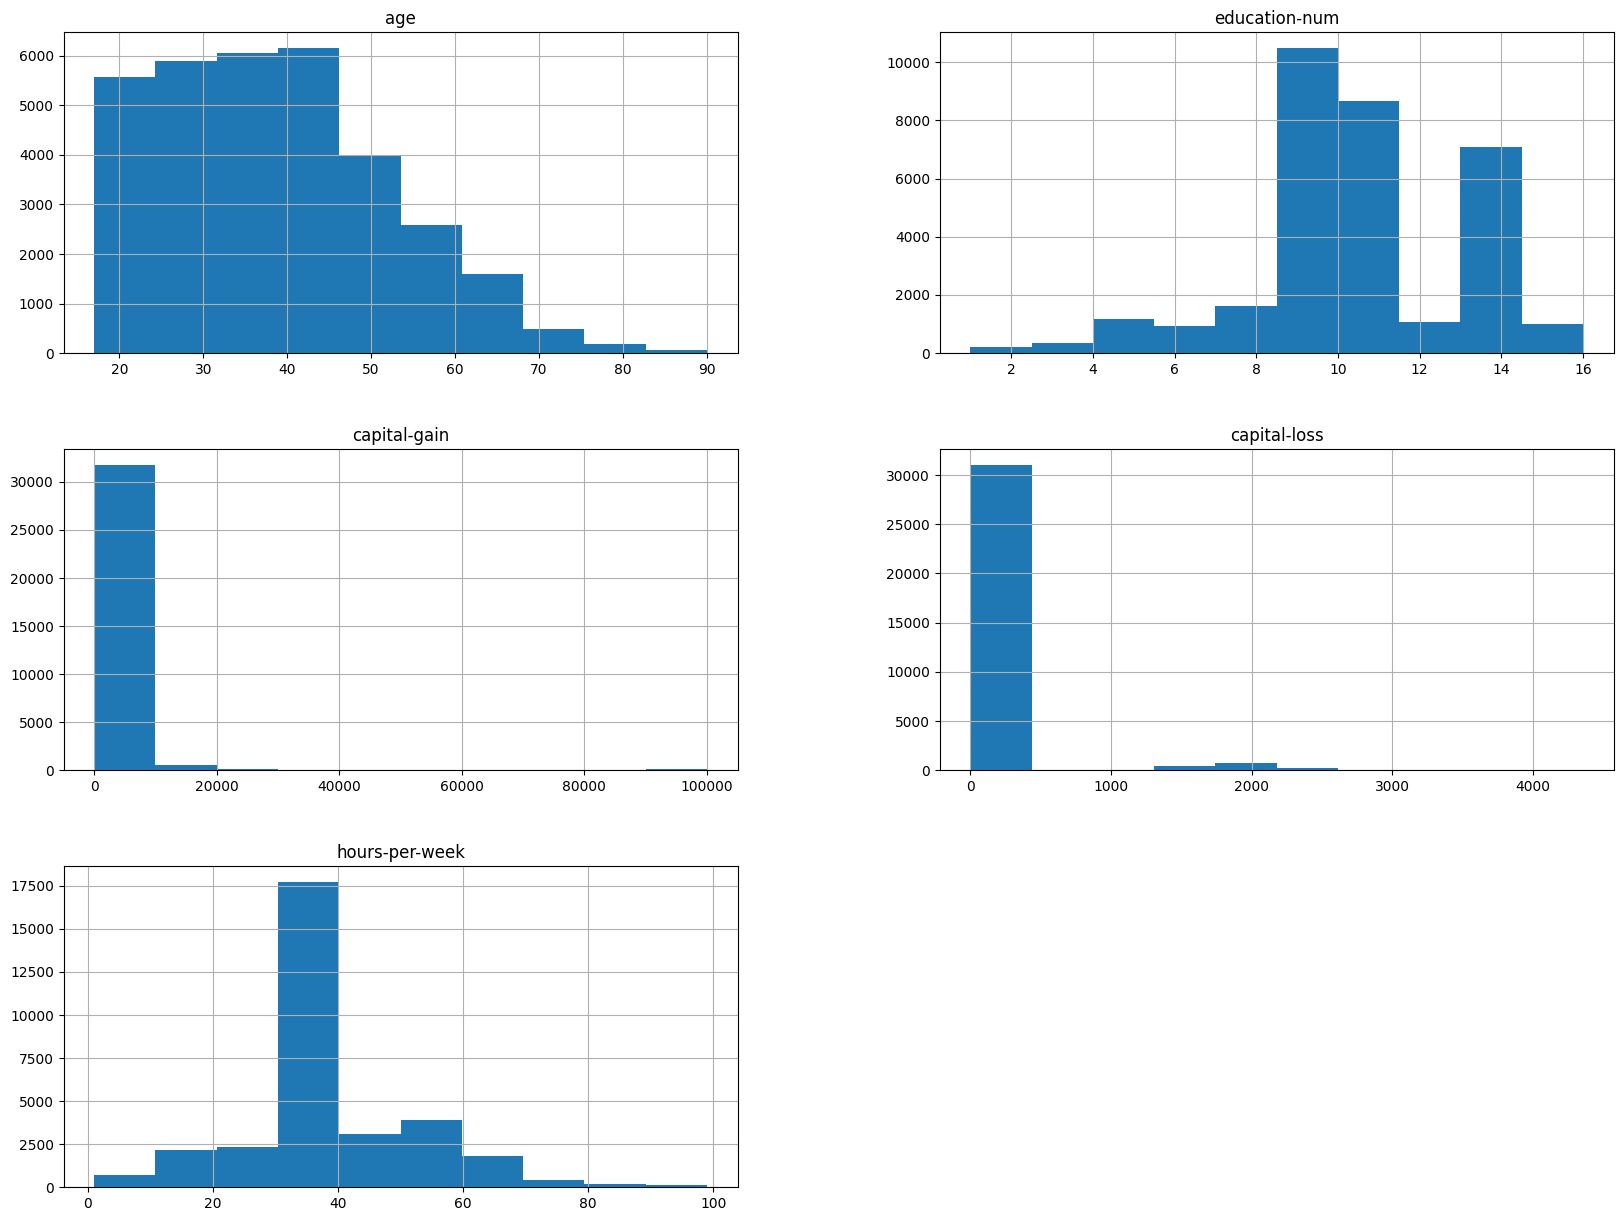

In [10]:
data.hist(figsize=(20,15))
plt.show()

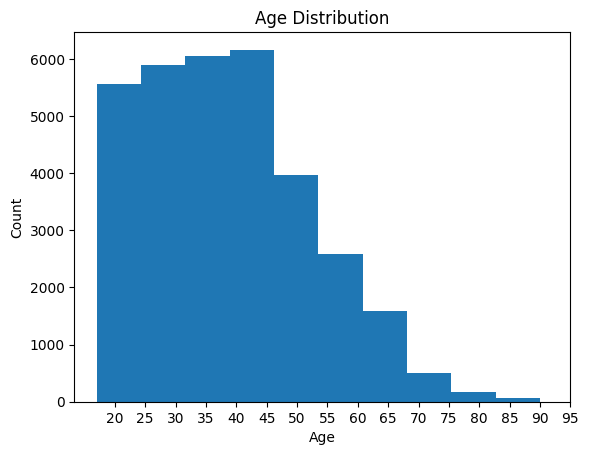

In [11]:
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Age Distribution')
plt.show()

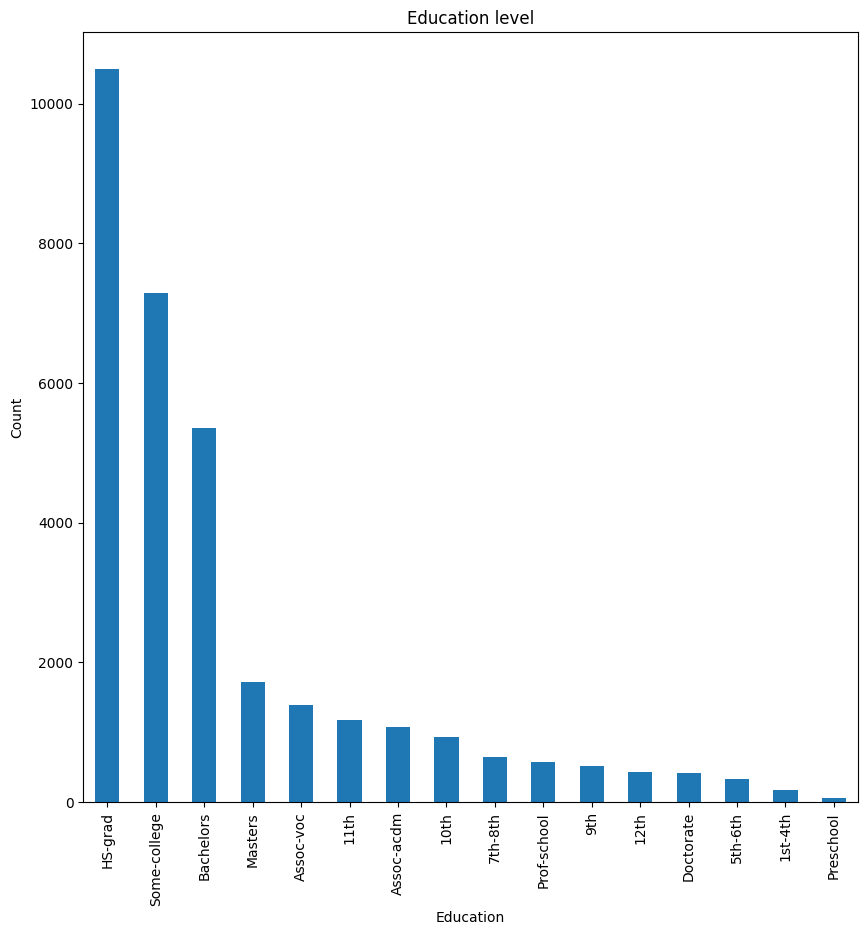

In [12]:
data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()

Text(0.5, 1.0, 'gender count')

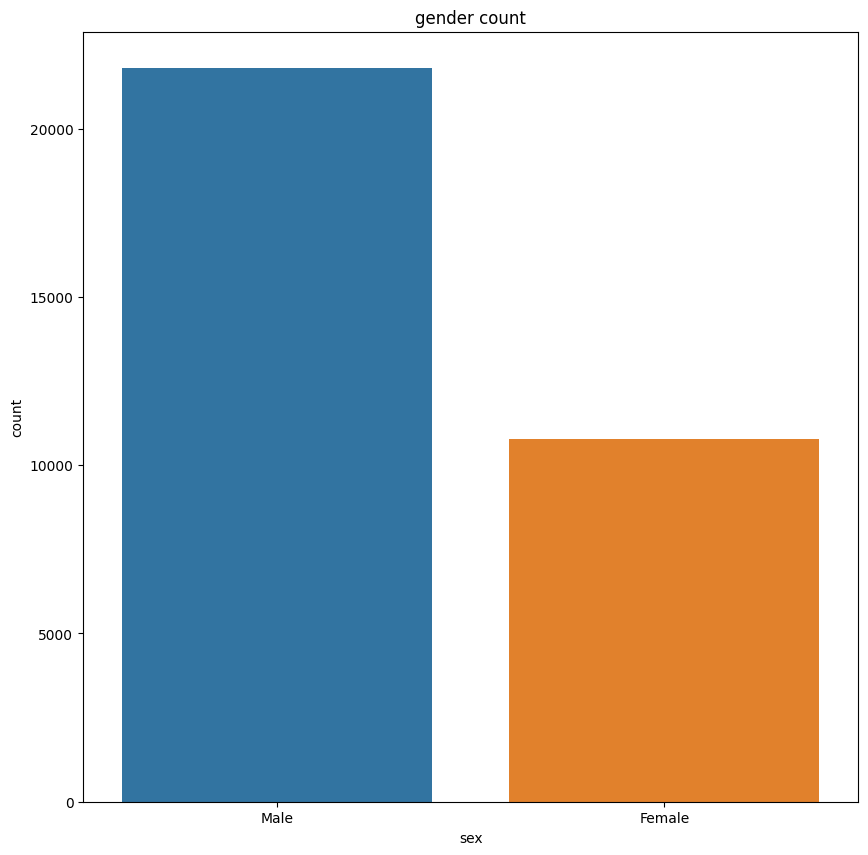

In [13]:
sns.countplot(x=data['sex'])
plt.title('gender count')

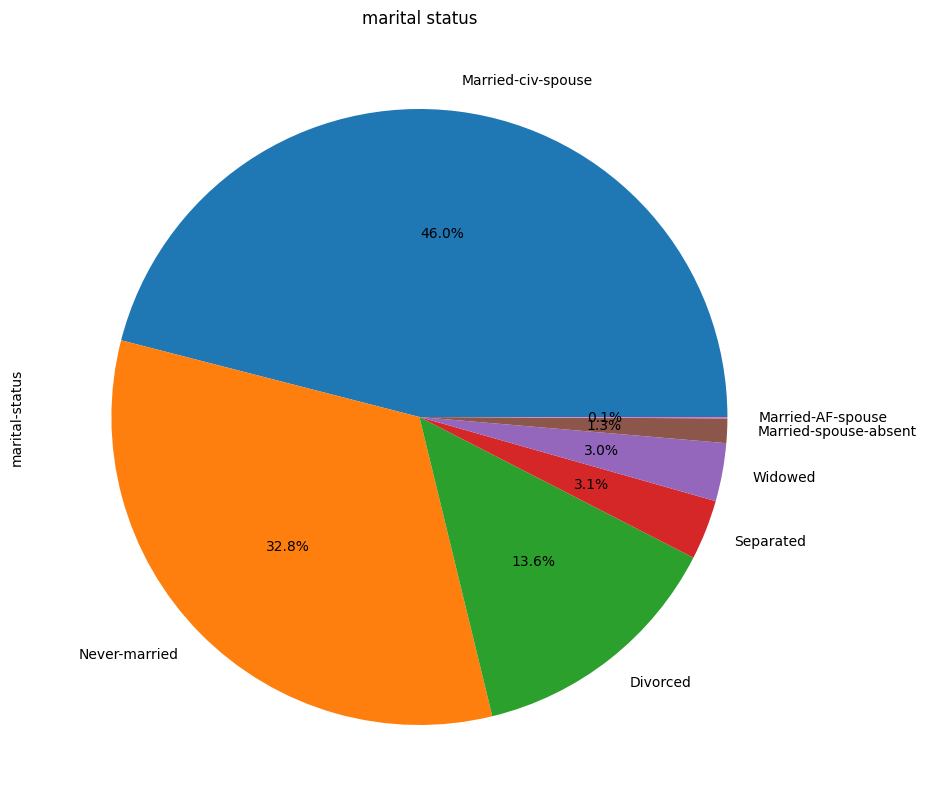

In [14]:
data['marital-status'].value_counts().plot(kind = 'pie',subplots=True, autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('marital status')
plt.show()

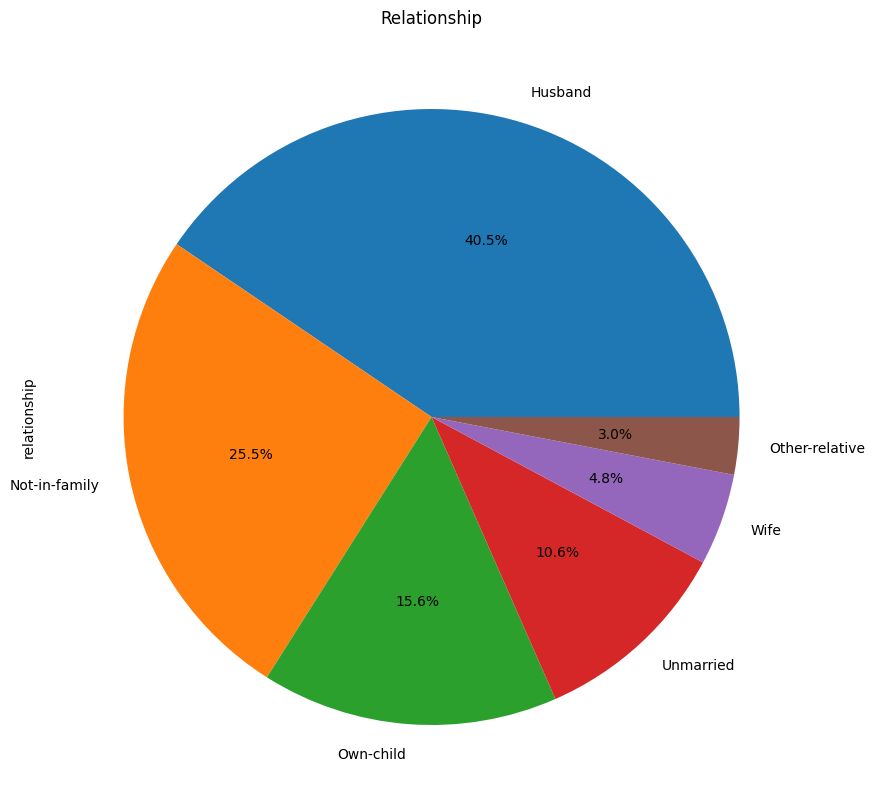

In [15]:
data['relationship'].value_counts().plot(kind = 'pie',subplots=True, autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Relationship')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

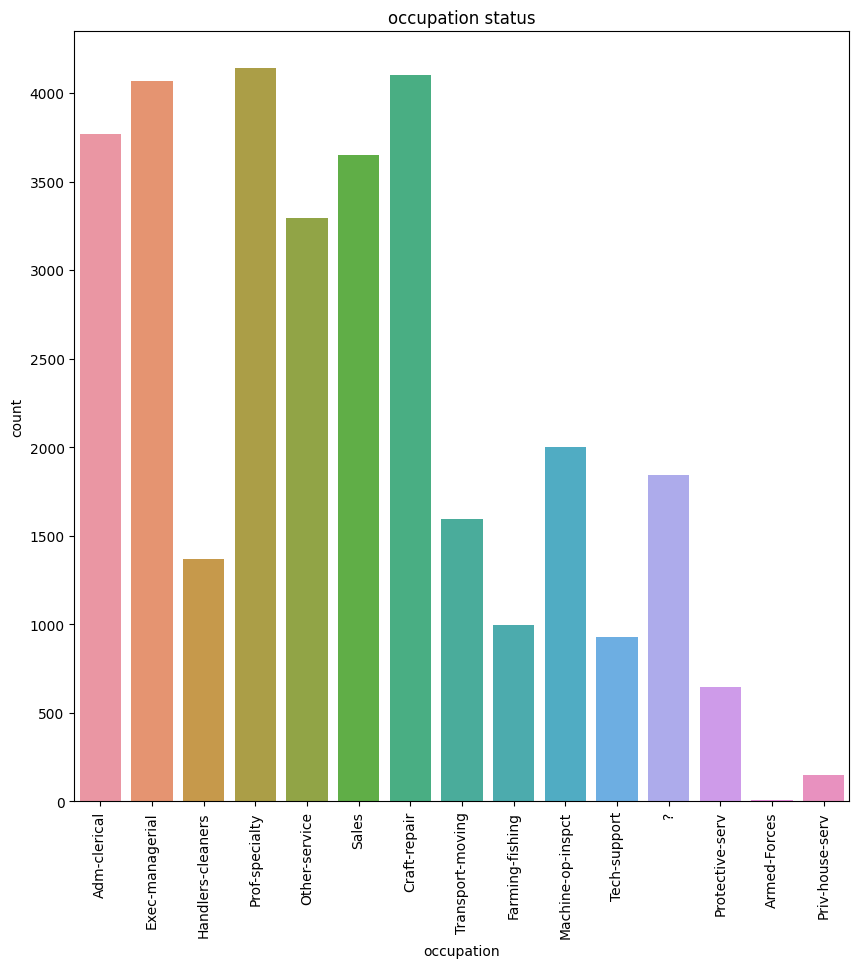

In [16]:
sns.countplot(x=data['occupation'])
plt.xticks(rotation=90)
plt.title('occupation status')
plt.show

# 2.Data Preprocessing

# 2.1.HANDLING MISSING VALUES

In [17]:
#check null values
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# 2.2 CORRELATION

<AxesSubplot: >

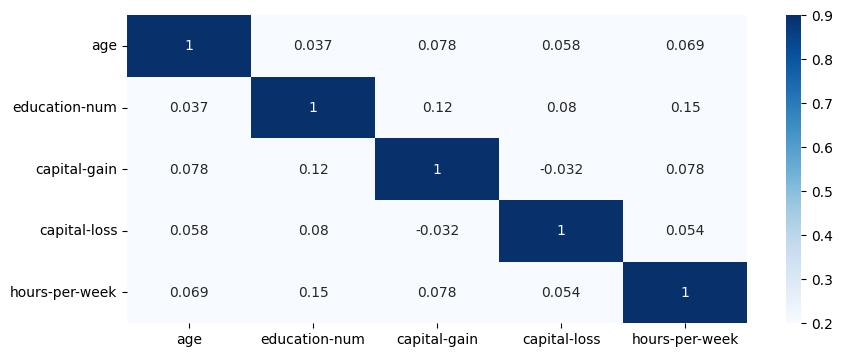

In [18]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

DROP UNNECESSARY COLUMNS


In [19]:
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)

# 2.3 REMOVING OR MODIFYING OUTLIERS

OUTLIER DETECTION


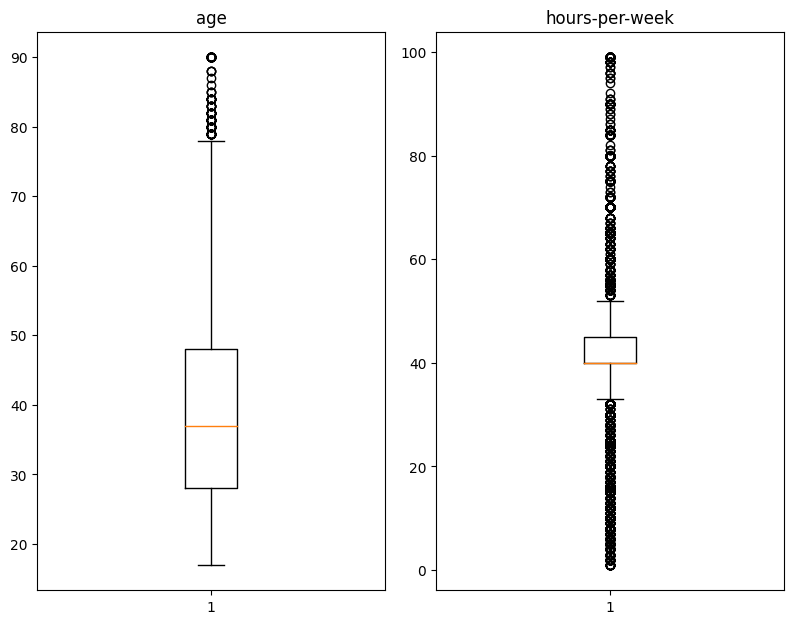

In [20]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

MODIFYING OUTLIERS


In [21]:
for i in num_col:
    Q1=data[i].quantile(0.25) # 25th quantile
    Q3=data[i].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[i] = np.clip(data[i], Lower_Whisker, Upper_Whisker)

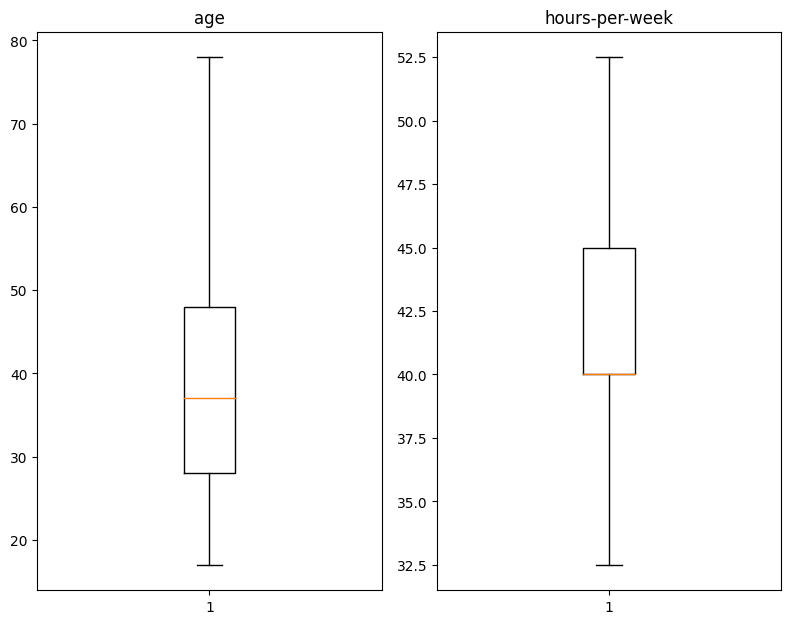

In [22]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

In [23]:
from sklearn import preprocessing 
label= preprocessing.LabelEncoder()  
data['workclass']=label.fit_transform(data['workclass'])
data['education']=label.fit_transform(data['education'])
data['occupation']=label.fit_transform(data['occupation'])
data['sex']=label.fit_transform(data['sex'])
#data['salary']=label.fit_transform(data['salary'])
data['race']=label.fit_transform(data['race'])
data['native-country']=label.fit_transform(data['native-country'])
data['marital-status']=label.fit_transform(data['marital-status'])
data['relationship']=label.fit_transform(data['relationship'])

In [24]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,7,9,4,1,1,4,1,40.0,39,<=50K
1,50,6,9,2,4,0,4,1,32.5,39,<=50K
2,38,4,11,0,6,1,4,1,40.0,39,<=50K
3,53,4,1,2,6,0,2,1,40.0,39,<=50K
4,28,4,9,2,10,5,2,0,40.0,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,2,13,5,4,0,38.0,39,<=50K
32557,40,4,11,2,7,0,4,1,40.0,39,>50K
32558,58,4,11,6,1,4,4,0,40.0,39,<=50K
32559,22,4,11,4,1,3,4,1,32.5,39,<=50K


# Standard Scaling

In [25]:
X=data.drop(columns=['salary'],axis=1)
y=data['salary']

In [26]:
X.describe()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.555603,3.868892,10.298210,2.611836,6.572740,1.446362,3.665858,0.669205,41.202451,36.718866
std,13.556130,1.455960,3.870264,1.506222,4.228857,1.606771,0.848806,0.470506,6.187005,7.823782
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.500000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,45.000000,39.000000
max,78.000000,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,52.500000,41.000000


In [27]:
X.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country'],
      dtype='object')

In [28]:
#import library
from sklearn.preprocessing import StandardScaler

In [29]:
#fitting the model
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [30]:
type(X)

numpy.ndarray

In [31]:
X=pd.DataFrame(X,columns=['age', 'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'hours-per-week', 'native-country'])

In [32]:
X

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,0.032782,2.150579,-0.335437,0.921634,-1.317809,-0.277805,0.393668,0.703071,-0.194354,0.291569
1,0.844236,1.463736,-0.335437,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-1.406591,0.291569
2,-0.040986,0.090050,0.181332,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.194354,0.291569
3,1.065541,0.090050,-2.402511,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.194354,0.291569
4,-0.778671,0.090050,-0.335437,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.194354,-4.054223
...,...,...,...,...,...,...,...,...,...,...
32556,-0.852440,0.090050,-0.852205,-0.406212,1.519881,2.211698,0.393668,-1.422331,-0.517617,0.291569
32557,0.106551,0.090050,0.181332,-0.406212,0.101036,-0.900181,0.393668,0.703071,-0.194354,0.291569
32558,1.434384,0.090050,0.181332,2.249480,-1.317809,1.589322,0.393668,-1.422331,-0.194354,0.291569
32559,-1.221282,0.090050,0.181332,0.921634,-1.317809,0.966947,0.393668,0.703071,-1.406591,0.291569


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Logistic regression

In [35]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor_model=lor.fit(X_train,y_train)
y_predict_lor=lor_model.predict(X_test)

In [36]:
y_predict_lor

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

**confusion matrix**

In [37]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [38]:
#confusion matrix
confusion_matrix(y_test,y_predict_lor)

array([[6990,  465],
       [1736,  578]], dtype=int64)

**precision,accuracy and recall score**

In [39]:
#import precision score and recall score
from sklearn.metrics import precision_score,recall_score

In [40]:
#precision score
precision_score(y_test,y_predict_lor,pos_label=1,average='micro')

0.7746954652472106

In [41]:
#recallscore
recall_score(y_test,y_predict_lor,pos_label=1,average='micro')

0.7746954652472106

In [42]:
#check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_lor)

0.7746954652472106

In [43]:
R1=accuracy_score(y_test,y_predict_lor)*100
R1

77.46954652472105

# K-Nearest Neighbor(KNN) classifier

In [44]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
metric_k=[]
neighbors=range(3,20)
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(X_train,y_train)
  y_pred_kNN=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred_kNN)
  metric_k.append(acc)

In [46]:
#print metric
metric_k

[0.793325826594329,
 0.8024362780223155,
 0.8047906643464019,
 0.8079639676527792,
 0.8088852492578564,
 0.8139011157743884,
 0.8140034803971747,
 0.8153342204933974,
 0.8146176681338929,
 0.8160507728529021,
 0.8151294912478247,
 0.8180980653086294,
 0.8183027945542021,
 0.8222950148428703,
 0.8171767837035521,
 0.8191217115364929,
 0.8188146176681339]

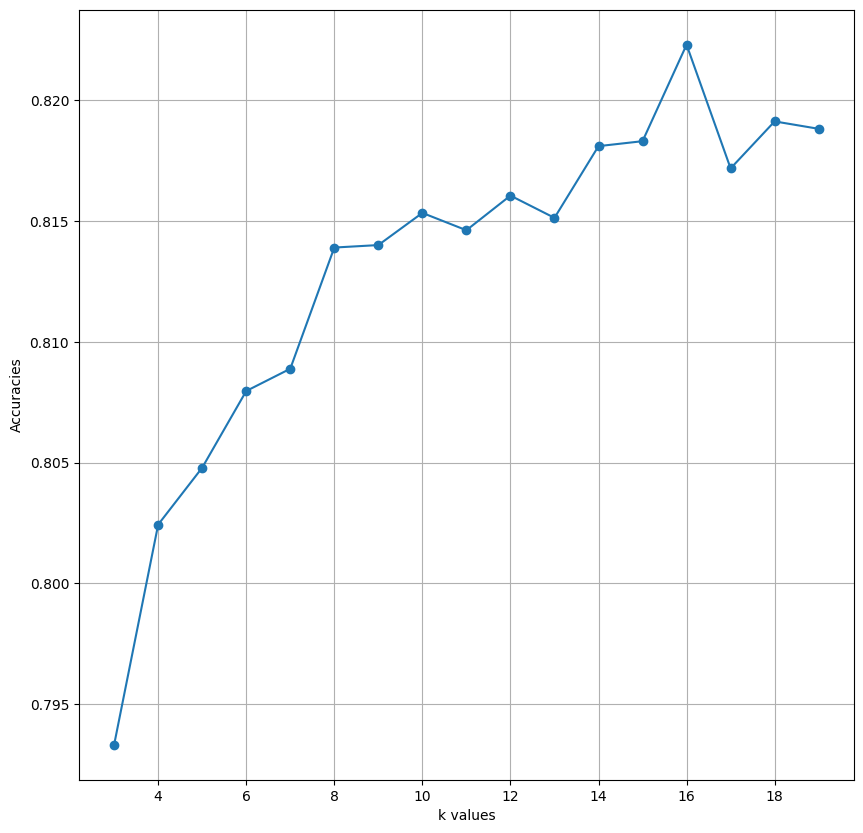

In [47]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [48]:
classifier= KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [49]:
#find confusion matrix
confusion_matrix(y_test,y_pred_kNN)

array([[6583,  872],
       [1035, 1279]], dtype=int64)

In [50]:
#find precision score
precision_score(y_test,y_pred_kNN,pos_label=1,average='micro')

0.8047906643464019

In [51]:
#find recall score
recall_score(y_test,y_pred_kNN,pos_label=1,average='micro')

0.8047906643464019

In [52]:
#find accuracy score
accuracy_score(y_test,y_pred_kNN)

0.8047906643464019

In [53]:
R2=accuracy_score(y_test,y_pred_kNN)*100

# Support Vector Machine (SVM) Classifier

In [54]:
#import Support Vector Classification
from sklearn.svm import SVC

**kernel type- linear**

In [55]:
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [56]:
#find confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[7455,    0],
       [2314,    0]], dtype=int64)

In [57]:
#find precision score
precision_score(y_test,y_pred_svm,pos_label=1,average='micro')

0.7631282628723514

In [58]:
#find recall score
recall_score(y_test,y_pred_svm,pos_label=1,average='micro')

0.7631282628723514

In [59]:
#find accuracy score
accuracy_score(y_test,y_pred_svm)

0.7631282628723514

In [60]:
R3=accuracy_score(y_test,y_pred_svm)*100

**kernel type-RBF**

In [61]:
svm_clf2=SVC(kernel='rbf')
svm_clf2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_clf2.predict(X_test)

In [62]:
#find confusion_matrix
confusion_matrix(y_test,y_pred_svm2)

array([[6642,  813],
       [1112, 1202]], dtype=int64)

In [63]:
#find precision score
precision_score(y_test,y_pred_svm2,pos_label=1,average='micro')

0.8029481011362473

In [64]:
#find recall score
recall_score(y_test,y_pred_svm2,pos_label=1,average='micro')

0.8029481011362473

In [65]:
#find accuracy score
accuracy_score(y_test,y_pred_svm2)

0.8029481011362473

In [66]:
R4=accuracy_score(y_test,y_pred_svm2)*100

# Decision tree classifier

In [67]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt_clf= DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [69]:
#find confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[6367, 1088],
       [1108, 1206]], dtype=int64)

In [70]:
#find precision score
precision_score(y_test,y_pred_dt,pos_label=1,average='micro')

0.7752072883611424

In [71]:
#find recall score
recall_score(y_test,y_pred_dt,pos_label=1,average='micro')

0.7752072883611424

In [72]:
#find accuracy score
accuracy_score(y_test,y_pred_dt)

0.7752072883611424

In [73]:
R5=accuracy_score(y_test,y_pred_dt)*100

# Random forest classifier


In [74]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [76]:
#find confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[6693,  762],
       [1025, 1289]], dtype=int64)

In [77]:
#find precision score
precision_score(y_test,y_pred_rf,pos_label=1,average='micro')

0.8170744190807657

In [78]:
#find recall score
recall_score(y_test,y_pred_rf,pos_label=1,average='micro')

0.8170744190807657

In [79]:
#find accuracy score
accuracy_score(y_test,y_pred_rf)

0.8170744190807657

In [83]:
R6=accuracy_score(y_test,y_pred_rf)*100

# AdaBoost Classifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200, random_state=0)

In [85]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=0)

In [86]:
pred=clf.predict(X_test)

In [87]:
#find confusion matrix
confusion_matrix(y_test,pred)

array([[6873,  582],
       [ 988, 1326]], dtype=int64)

In [88]:
#find recall score
recall_score(y_test,pred,pos_label=1,average='micro')

0.8392875422254069

In [89]:
#find accuracy score
accuracy_score(y_test,pred)

0.8392875422254069

In [90]:
R7=accuracy_score(y_test,pred)*100

# Model results

In [91]:
metric_results= {'Model': ['Logistic Regression','KNeighbors', 'SVM(linear)','SVM(RBF)','Decision Tree','Random Forest','AdaBoost'], 
                 'Accuracy': [R1, R2, R3,R4,R5,R6,R7]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,Accuracy
0,Logistic Regression,77.469547
1,KNeighbors,80.479066
2,SVM(linear),76.312826
3,SVM(RBF),80.294810
4,Decision Tree,77.520729
5,Random Forest,81.707442
6,AdaBoost,83.928754


**AdaBoost classfier shows better accuracy**

In [92]:
# save the model
import pickle
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))